# **LIBRARIES**

In [ ]:
import numpy as np
np.random.seed(0)
from tensorflow.random import set_seed
set_seed(0)

import pandas as pd
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np



In [ ]:
import google.colab
google.colab.drive.mount('/content/drive')

Mounted at /content/drive


# **DATASET**

In [ ]:
actual_df = pd.read_csv('/content/drive/MyDrive/IBS_DATA/actual.csv')
actual_df.head()

,patient,cancer
0,1,ALL
1,2,ALL
2,3,ALL
3,4,ALL
4,5,ALL


In [ ]:
actual_df['cancer'].value_counts()

,count
cancer,
ALL,47
AML,25


In [ ]:
actual_df.shape

(72, 2)

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/IBS_DATA/data_set_ALL_AML_train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/IBS_DATA/data_set_ALL_AML_independent.csv')

In [ ]:
print("Shape of Training Data: ", train_df.shape)
print("Shape of Testing Data: ", test_df.shape)

Shape of Training Data:  (7129, 78)
Shape of Testing Data:  (7129, 70)


`.head():` is a pandas method that returns the first 5 rows of the DataFrame by default. It is used for a quick preview of the data.

In [ ]:
train_df.head()

,Gene Description,Gene Accession Number,1,call,2,call.1,3,call.2,4,call.3,...,29,call.33,30,call.34,31,call.35,32,call.36,33,call.37
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,A,-139,A,-76,A,-135,A,...,15,A,-318,A,-32,A,-124,A,-135,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,A,-73,A,-49,A,-114,A,...,-114,A,-192,A,-49,A,-79,A,-186,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,A,-1,A,-307,A,265,A,...,2,A,-95,A,49,A,-37,A,-70,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,A,283,A,309,A,12,A,...,193,A,312,A,230,P,330,A,337,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,A,-264,A,-376,A,-419,A,...,-51,A,-139,A,-367,A,-188,A,-407,A


The 7129 gene descriptions are provided as the rows and the values for each patient as the columns.

In [ ]:
train_to_keep=[col for col in train_df.columns if "call" not in col]
test_to_keep=[col for col in test_df.columns if "call" not in col]

X_train = train_df[train_to_keep]
X_test = test_df[test_to_keep]

Now we can simply transpose both training and testing dataframes so that genes become columns(features) and patients become rows.

In [ ]:
X_train = X_train.T
X_test = X_test.T

The first 2 rows are duplicated so we can remove 'Gene Description' and set 'Gene Accession Number' as the column headers.

In [ ]:
X_train.columns = X_train.iloc[1]
X_test.columns = X_test.iloc[1]

X_train = X_train.drop(['Gene Description', 'Gene Accession Number'])
X_test = X_test.drop(['Gene Description', 'Gene Accession Number'])

Neither the training and testing row indexes are not in numeric order, so it's important that we reorder these, so that the labels will line up with the corresponding data.

In [ ]:
X_train.index = X_train.index.astype(int)
X_train.sort_index(inplace=True)

X_test.index = X_test.index.astype(int)
X_test.sort_index(inplace=True)

In the end, our data looks like this:

In [ ]:
print("Shape of Training data:\t", X_train.shape)
print("Shape of Testing Data:\t", X_test.shape)

Shape of Training data:	 (38, 7129)
Shape of Testing Data:	 (34, 7129)


In [ ]:
X_train.head()
X_test.head()


Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
39,-342,-200,41,328,-224,-427,-656,-292,137,-144,...,277,1023,67,214,-135,1074,475,48,168,-70
40,-87,-248,262,295,-226,-493,367,-452,194,162,...,83,529,-295,352,-67,67,263,-33,-33,-21
41,-62,-23,-7,142,-233,-284,-167,-97,-12,-70,...,129,383,46,104,15,245,164,84,100,-18
42,22,-153,17,276,-211,-250,55,-141,0,500,...,413,399,16,558,24,893,297,6,1971,-42
43,86,-36,-141,252,-201,-384,-420,-197,-60,-468,...,341,91,-84,615,-52,1235,9,7,1545,-81


Now let's split the target labels into training and testing targets.

In [ ]:
y = actual_df.replace({'ALL':0, 'AML':1})
y = y.set_index('patient')
labels = ['ALL', 'AML']

<ipython-input-16-6b0bead054ba>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = actual_df.replace({'ALL':0, 'AML':1})


In [ ]:
y_train = y['cancer'][:38]
y_test = y['cancer'][38:]

Note that the test set must use identical scaling to the training set.

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **Dimentionality reduction - PCA**

You need to apply the same PCA on training and testing sets.

In [ ]:
pca = PCA(n_components = 0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
print(X_train_pca.shape)
print(X_test_pca.shape)

(38, 32)
(34, 32)


95% of variance is explained by 32 principal components. We can't plot something in 32 dimensions, so let's just see what the PCA looks like when we just pick the top three compoments.

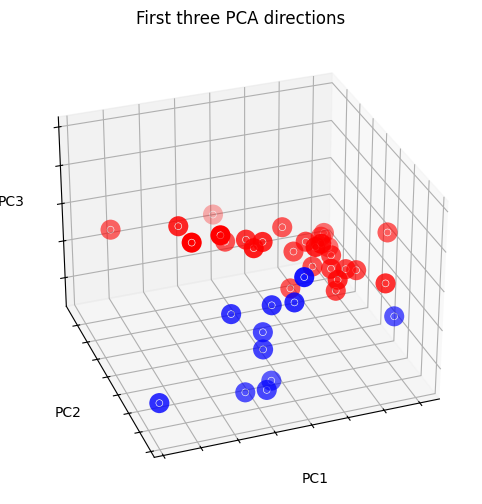

In [ ]:

# Assuming X_train_scaled and y_train are defined
pca3 = PCA(n_components=3).fit_transform(X_train_scaled)
colors = np.where(y_train == 0, 'red', 'blue')

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d', elev=-150, azim=110)
ax.scatter(pca3[:, 0], pca3[:, 1], pca3[:, 2], c=colors, linewidths=10)
ax.set_title("First three PCA directions")
ax.set_xlabel("PC1")
ax.set_xticklabels([])
ax.set_ylabel("PC2")
ax.set_yticklabels([])
ax.set_zlabel("PC3")
ax.set_zticklabels([])

plt.show()


# **ANN MODEL**

In [ ]:
NN_model = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=X_train_pca[1].shape),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
NN_model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['binary_accuracy']
)

In [ ]:
train_history = NN_model.fit(
    X_train_pca, y_train,
    validation_data=(X_test_pca, y_test),
    batch_size = 8,
    epochs = 200,
)

Epoch 1/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 126ms/step - binary_accuracy: 0.1778 - loss: 5.6512 - val_binary_accuracy: 0.3235 - val_loss: 3.4548
Epoch 2/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - binary_accuracy: 0.2613 - loss: 4.0908 - val_binary_accuracy: 0.3529 - val_loss: 2.8881
Epoch 3/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - binary_accuracy: 0.3657 - loss: 3.0383 - val_binary_accuracy: 0.3824 - val_loss: 2.3739
Epoch 4/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - binary_accuracy: 0.3657 - loss: 2.1662 - val_binary_accuracy: 0.4118 - val_loss: 1.9183
Epoch 5/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - binary_accuracy: 0.4805 - loss: 1.4818 - val_binary_accuracy: 0.4412 - val_loss: 1.5408
Epoch 6/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - binary_accuracy: 0.5468 - loss: 1.0179 - val_binary_accuracy: 0.4706 - val_loss: 1.2416
Epoch 7/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - binary_accuracy: 0.7052 - loss: 0.7029 - val_binary_accuracy: 0.4706 - val_loss: 1.0157
Epoch 8/200
5/5 ━━━

# **PREDICTED OUTPUTS**

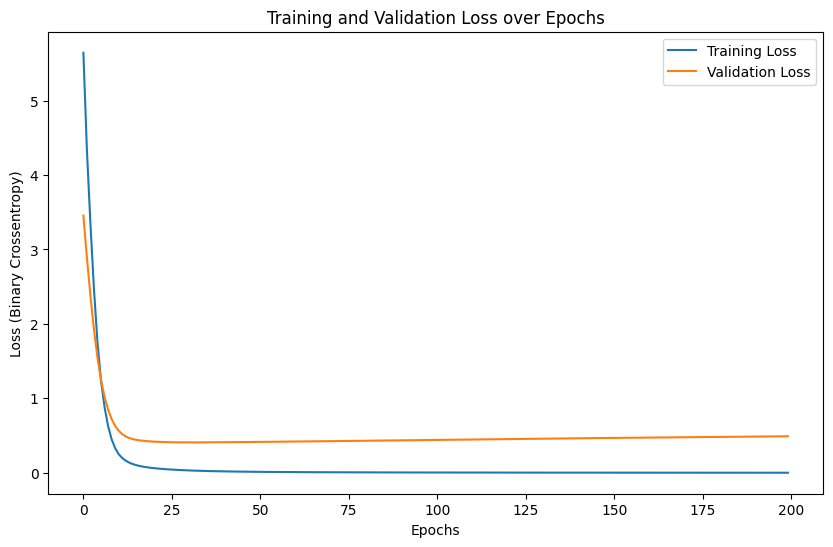

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

plt.figure(figsize=(10, 6))
# Plot training & validation loss over epochs
plt.plot(train_history.history['loss'], label='Training Loss')
plt.plot(train_history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss (Binary Crossentropy)")
plt.legend()
plt.title("Training and Validation Loss over Epochs")
plt.show()

In [ ]:
# Make predictions on the test data
y_pred = NN_model.predict(X_test_pca)
# Convert probabilities to binary classes


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


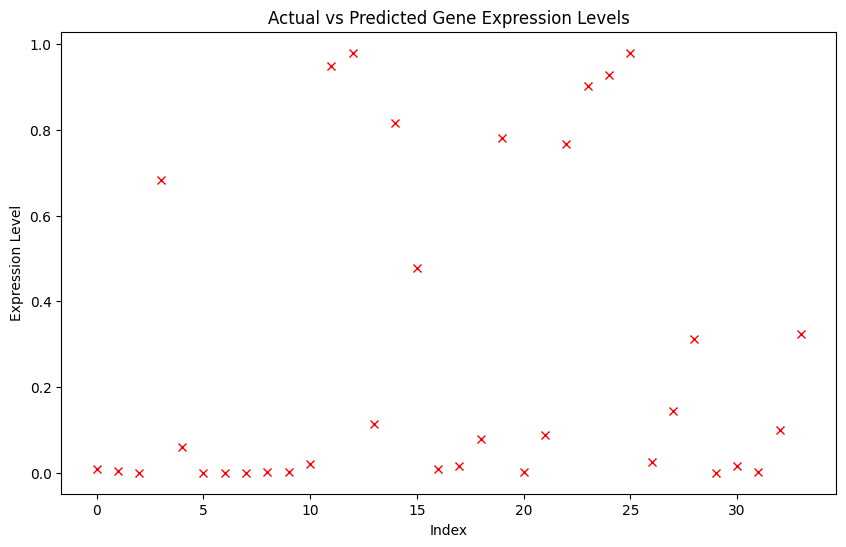

In [ ]:
import matplotlib.pyplot as plt

# Plot the actual vs. predicted values as line graphs
plt.figure(figsize=(10, 6))

# Plot predicted values as a line graph
plt.plot(y_pred, label="Predicted Values", color="red", linestyle='', marker="x")

# Adding labels, title, and legend
plt.xlabel("Index")
plt.ylabel("Expression Level")
plt.title("Actual vs Predicted Gene Expression Levels")

plt.show()


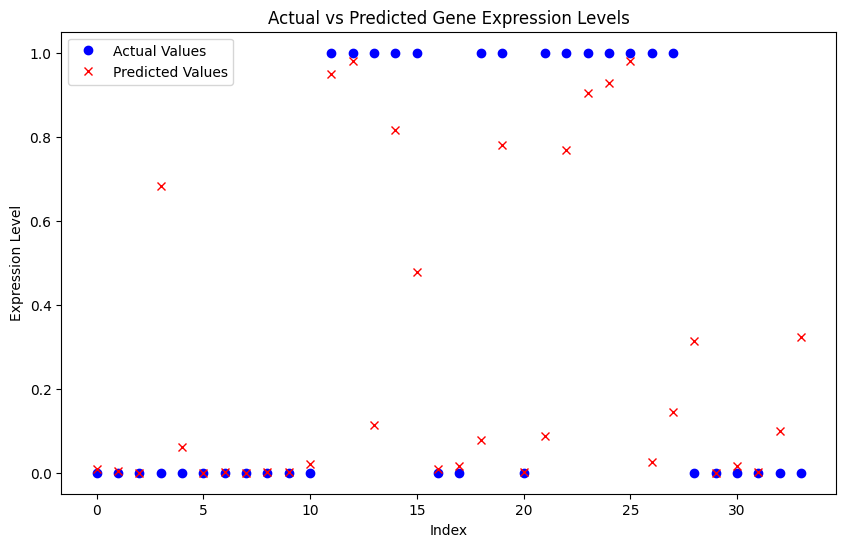

In [ ]:
# Plot the actual vs. predicted values as line graphs
plt.figure(figsize=(10, 6))

# Plot actual values as a line graph
plt.plot(y_test.values, label="Actual Values", color="blue", marker="o", linestyle="")

# Plot predicted values as a line graph
plt.plot(y_pred, label="Predicted Values", color="red", marker="x", linestyle="")

# Adding labels, title, and legend
plt.xlabel("Index")
plt.ylabel("Expression Level")
plt.title("Actual vs Predicted Gene Expression Levels")
plt.legend()
plt.show()

